In [1]:
import mttime
import os
from pathlib import Path
import pandas as pd
import numpy as np
import obspy
import itertools
from preprocessing_tools import *

Aquí también se quiere realizar la inversión para todos los eventos dentro del catálogo. Sin embargo, no hay forma simple de cargar de vuelta el resultado de la inversión, así que se tiene que realizar cada vez que se quiere observar un resultado concreto.

Si ya se han procesado las observaciones y obtenido los sintéticos correspondientes para cierto evento, únicamente es necesario ejecutar esta libreta para visualizar el resultado.

In [2]:
directorio_recortado = "Datos_Trim/"

catalog_sub = 'catalog.dat'
catalogSSN_Oaxaca = 'catalogSSN_Oaxaca.dat'
catalogSSN_Guerrero = 'catalogSSN_Guerrero.dat'

# Generados durante el preprocesamiento
station_file = "station.csv"
ev_st = "ev_st.csv"

df_catalog = read_catalog(catalogSSN_Oaxaca)
stations_meta = pd.read_csv(station_file)
ev_st_df = pd.read_csv(ev_st)

In [9]:
evid_Oaxaca = "2016.06.27.20.50.35"
evid_Guerrero = "2016.07.19.13.42.46"

evid_1 = "2018.08.12.14.42.09"
evid_2 = "2021.09.08.01.47.53" # Prioridad
evid_3 = "2021.03.20.03.06.35"
evid_4 = "2018.03.30.15.08.01"
evid_5 = "2019.09.30.23.15.32"

evdir = directorio_recortado + evid_1

In [10]:
# Call the Configure object to read the input file and set up the inversion
config = mttime.Configure(path_to_file=evdir+"/mtinv.in")

# Quick look at the attributes
print(config)

       event: {'datetime': '2018-08-12T14:42:09.000000Z', 'longitude': -100.84, 'latitude': 17.11}
       depth: [24.0, 34.0, 44.0, 54.0, 64.0]
       green: herrmann
  components: ['Z', 'R', 'T']
      degree: 5
      weight: distance
        plot: False
   correlate: False

| STATION TABLE |
station  distance  azimuth  ts  npts   dt  Z  R  T  longitude  latitude
   AAIG    561.58   343.52  30   150 1.00  1  1  1    -102.38     21.97
   ACIG    348.60    24.11  30   150 1.00  1  1  1     -99.48     19.98
   ANIG    583.56   319.00  30   150 1.00  1  1  1    -104.52     21.05
   ARIG    139.69    21.89  30   150 1.00  1  1  1    -100.35     18.28
   CRIG    169.24   103.92  30   150 1.00  1  1  1     -99.30     16.74
   DAIG    126.98    94.26  30   150 1.00  1  1  1     -99.65     17.02
   DHIG    401.15    28.04  30   150 1.00  1  1  1     -99.04     20.30
   FTIG    300.75    72.52  30   150 1.00  1  1  1     -98.13     17.91
   HLIG    332.21    75.67  30   150 1.00  1  1  1     -9

In [11]:
config.station_table

,station,distance,azimuth,ts,npts,dt,Z,R,T,longitude,latitude
0,AAIG,561.58,343.52,30,150,1.0,1,1,1,-102.38,21.97
1,ACIG,348.60,24.11,30,150,1.0,1,1,1,-99.48,19.98
2,ANIG,583.56,319.00,30,150,1.0,1,1,1,-104.52,21.05
3,ARIG,139.69,21.89,30,150,1.0,1,1,1,-100.35,18.28
4,CRIG,169.24,103.92,30,150,1.0,1,1,1,-99.30,16.74
5,DAIG,126.98,94.26,30,150,1.0,1,1,1,-99.65,17.02
6,DHIG,401.15,28.04,30,150,1.0,1,1,1,-99.04,20.30
7,FTIG,300.75,72.52,30,150,1.0,1,1,1,-98.13,17.91
8,HLIG,332.21,75.67,30,150,1.0,1,1,1,-97.80,17.83
9,HUIG,526.64,105.68,30,150,1.0,1,1,1,-96.11,15.77


In [12]:
def get_mtinv_sub(station_table, sta_remove):
    
    df = station_table.drop(station_table.index[station_table['station'].isin(sta_remove)])
    
    with open(evdir+'/mtinv.in', 'r') as f_read:
        lines = f_read.readlines()

    with open(evdir+'/mtinv_sub.in', 'w') as f_write:
        for i, line in enumerate(lines):
            if i < 12:
                f_write.write(line)
            else:
                f_write.write(df.to_string(index=False))
                break
                    
    return df

## Método 1

Probar todas las combinaciones es muy tardado y el mejor resultado no se aleja de lo obtenido con los otros métodos.

In [13]:
#max_vr_dc = 0
#station_table = config.station_table.copy()

#station_table.drop(columns=['Z', 'R', 'T'], inplace=True)
#station_table['used'] = [1 for i in range(station_table.values.shape[0])]

#stations = station_table['station']
#combs = []
#for i in range(len(stations)-4, len(stations)-3):
#    combs = combs+list(itertools.combinations(stations, i))
    
#for comb in combs:
#    station_table_sub = get_mtinv_sub(station_table, comb)
#    config = mttime.Configure(path_to_file=evdir+"/mtinv_sub.in")
        
#    tdmt = mttime.Inversion(config=config)
#    tdmt.invert()

#    max_dc = 0
#    for tensor in tdmt.moment_tensors:
#        percent_dc = tensor.pdc
#        if percent_dc > max_dc:
#            max_dc = percent_dc
#            preferred_tensor = tensor
                
#    vr = preferred_tensor.total_VR
#    vr_dc = vr*max_dc
        
#    if vr_dc > max_vr_dc:
#        best_config = config
#        max_vr_dc = vr_dc

## Método 2

Este método obtiene el resultado de la inversión tras eliminar una sola estación a la vez para conseguir la mejor combinación. A partir de esta combinación, se repite el mismo proceso. Es un método más exhaustivo que el método 3.

In [14]:
max_vr_dc = 0
station_table = config.station_table.copy()

station_table.drop(columns=['Z', 'R', 'T'], inplace=True)
station_table['used'] = [1 for i in range(station_table.values.shape[0])]

higher_max = True
while station_table.values.shape[0] > 4 and higher_max:
    higher_max = False
    sta_table = station_table.copy()
    for sta_remove in sta_table['station']:
        station_table_sub = get_mtinv_sub(sta_table, [sta_remove])
        config = mttime.Configure(path_to_file=evdir+"/mtinv_sub.in")
        
        tdmt = mttime.Inversion(config=config)
        tdmt.invert()

        max_dc = 0
        for tensor in tdmt.moment_tensors:
            percent_dc = tensor.pdc
            if percent_dc > max_dc:
                max_dc = percent_dc
                preferred_tensor = tensor
                
        vr = preferred_tensor.total_VR
        vr_dc = vr*max_dc
        
        if vr_dc > max_vr_dc:
            station_table = station_table_sub
            best_config = config
            max_vr_dc = vr_dc
            higher_max=True

Deviatoric Moment Tensor Inversion
Depth = 24.0000 km
Mw = 3.84
Percent DC/CLVD/ISO = 76/24/0
VR = 5.34%

Deviatoric Moment Tensor Inversion
Depth = 34.0000 km
Mw = 4.01
Percent DC/CLVD/ISO = 80/20/0
VR = 8.72%

Deviatoric Moment Tensor Inversion
Depth = 44.0000 km
Mw = 4.16
Percent DC/CLVD/ISO = 95/5/0
VR = 11.23%

Deviatoric Moment Tensor Inversion
Depth = 54.0000 km
Mw = 4.23
Percent DC/CLVD/ISO = 100/0/0
VR = 11.42%

Deviatoric Moment Tensor Inversion
Depth = 64.0000 km
Mw = 4.25
Percent DC/CLVD/ISO = 96/4/0
VR = 10.01%

Deviatoric Moment Tensor Inversion
Depth = 24.0000 km
Mw = 3.85
Percent DC/CLVD/ISO = 80/20/0
VR = 5.70%

Deviatoric Moment Tensor Inversion
Depth = 34.0000 km
Mw = 4.02
Percent DC/CLVD/ISO = 83/17/0
VR = 9.31%

Deviatoric Moment Tensor Inversion
Depth = 44.0000 km
Mw = 4.17
Percent DC/CLVD/ISO = 99/1/0
VR = 11.89%

Deviatoric Moment Tensor Inversion
Depth = 54.0000 km
Mw = 4.24
Percent DC/CLVD/ISO = 97/3/0
VR = 11.99%

Deviatoric Moment Tensor Inversion
Depth = 64

KeyboardInterrupt: 

## Método 3

Código que selecciona las mejores estaciones con un proceso iterativo que va eliminando la estación con el menor VR.

In [9]:
#max_vr = 0
#station_table = config.station_table.copy()

#station_table.drop(columns=['Z', 'R', 'T'], inplace=True)
#station_table['used'] = [1 for i in range(station_table.values.shape[0])]

#i = 0
#while station_table.values.shape[0] > 3:
#    if i == 0:
#        config = mttime.Configure(path_to_file=evdir+"/mtinv.in")
        
#    else:
#        station_table = get_mtinv_sub(station_table, sta_remove)
#        config = mttime.Configure(path_to_file=evdir+"/mtinv_sub.in")
            
#    tdmt = mttime.Inversion(config=config)
#    tdmt.invert()

#    max_dc = 0
#    for tensor in tdmt.moment_tensors:
#        percent_dc = tensor.pdc
#        if percent_dc > max_dc:
#            max_dc = percent_dc
#            preferred_tensor = tensor
        
    #tensor = tdmt.get_preferred_tensor()
#    tensor_table = preferred_tensor.station_table
#    vr = preferred_tensor.total_VR
#    if vr > max_vr:
#        max_vr = vr
#        best_config = config

#    sta_remove = tensor_table.loc[tensor_table['VR'] == tensor_table.VR.min()]['station']
#    i+=1          

## Método 4

Codigo que selecciona las tres mejores estaciones identificadas por el VR más alto en la primera inversión con todas las estaciones. Este método suele dar peores resultados que los otros métodos.

In [10]:
#config = mttime.Configure(path_to_file=evdir+"/mtinv.in")
#station_table = config.station_table.copy()
#station_table.drop(columns=['Z', 'R', 'T'], inplace=True)
#station_table['used'] = [1 for i in range(station_table.values.shape[0])]
#tdmt = mttime.Inversion(config=config)
#tdmt.invert()

#tensor = tdmt.get_preferred_tensor()
#tensor_table = tensor.station_table

#print(tensor_table)

#sta_remove = tensor_table.sort_values('VR', ascending=False).iloc[3:]['station'].values

#station_table = get_mtinv_sub(station_table, sta_remove)
#best_config = mttime.Configure(path_to_file=evdir+"/mtinv_sub.in")

# Verificar si polaridad es correcta

In [11]:
#get_mtinv_sub(station_table, azimuth_range_max)
config = mttime.Configure(path_to_file=evdir+"/mtinv_sub.in")
tdmt = mttime.Inversion(config=best_config)
tdmt.invert()

Deviatoric Moment Tensor Inversion
Depth = 24.0000 km
Mw = 4.03
Percent DC/CLVD/ISO = 81/19/0
VR = 7.67%

Deviatoric Moment Tensor Inversion
Depth = 34.0000 km
Mw = 4.19
Percent DC/CLVD/ISO = 81/19/0
VR = 11.80%

Deviatoric Moment Tensor Inversion
Depth = 44.0000 km
Mw = 4.33
Percent DC/CLVD/ISO = 93/7/0
VR = 14.78%

Deviatoric Moment Tensor Inversion
Depth = 54.0000 km
Mw = 4.40
Percent DC/CLVD/ISO = 98/2/0
VR = 14.65%

Deviatoric Moment Tensor Inversion
Depth = 64.0000 km
Mw = 4.42
Percent DC/CLVD/ISO = 84/16/0
VR = 11.68%



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


changed order!!



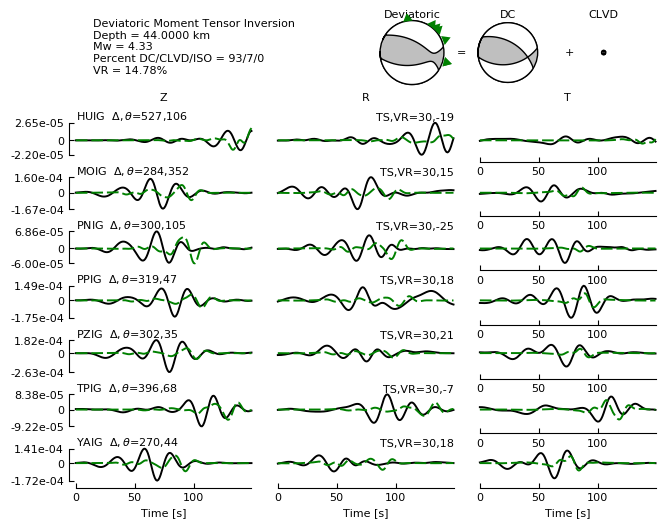

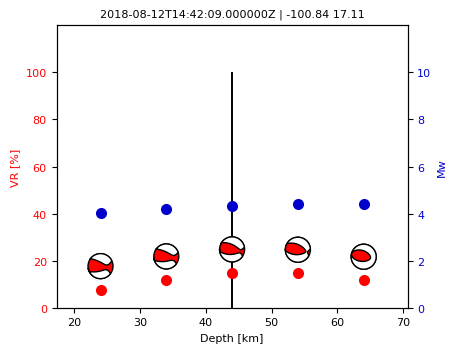

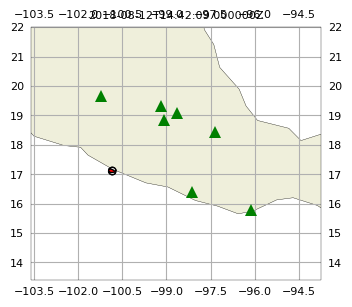

In [12]:
# To save figure to file set show=False

# Plot waveform fits of the best solution (highest VR)
tdmt.plot(view="waveform", option="preferred", show=True) # Ajuste de forma de onda
tdmt.plot(view="depth", show=True) # Solucion en funcion de la profundidad
tdmt.plot(view="map", show=True) # Solucion en un mapa

In [13]:
tdmt.get_preferred_tensor().station_table

,station,distance,azimuth,ts,npts,dt,Z,R,T,weights,VR,longitude,latitude
0,HUIG,526.64,105.68,30,150,1.0,1,1,1,1.950735,-18.702585,-96.11,15.77
1,MOIG,283.74,351.77,30,150,1.0,1,1,1,1.051006,14.795276,-101.23,19.65
2,PNIG,299.92,104.95,30,150,1.0,1,1,1,1.110938,-24.813008,-98.13,16.39
3,PPIG,318.96,46.89,30,150,1.0,1,1,1,1.181465,17.819617,-98.63,19.07
4,PZIG,302.08,35.33,30,150,1.0,1,1,1,1.118939,20.689132,-99.18,19.33
5,TPIG,396.29,68.01,30,150,1.0,1,1,1,1.467904,-7.058571,-97.36,18.42
6,YAIG,269.97,43.80,30,150,1.0,1,1,1,1.000000,17.815082,-99.07,18.86


Full Moment Tensor Inversion
Depth = 1.0000 km
Mw = 7.34
Percent DC/CLVD/ISO = 13/42/45
VR = 3.89%

Full Moment Tensor Inversion
Depth = 6.0000 km
Mw = 6.81
Percent DC/CLVD/ISO = 27/39/34
VR = 4.08%

Full Moment Tensor Inversion
Depth = 11.0000 km
Mw = 6.62
Percent DC/CLVD/ISO = 55/28/17
VR = 4.19%

Full Moment Tensor Inversion
Depth = 16.0000 km
Mw = 6.55
Percent DC/CLVD/ISO = 79/11/10
VR = 4.25%

Full Moment Tensor Inversion
Depth = 21.0000 km
Mw = 6.61
Percent DC/CLVD/ISO = 72/2/27
VR = 4.28%

Full Moment Tensor Inversion
Depth = 26.0000 km
Mw = 6.67
Percent DC/CLVD/ISO = 55/6/39
VR = 4.24%

Full Moment Tensor Inversion
Depth = 31.0000 km
Mw = 6.72
Percent DC/CLVD/ISO = 43/11/46
VR = 4.13%

Full Moment Tensor Inversion
Depth = 36.0000 km
Mw = 6.77
Percent DC/CLVD/ISO = 39/11/51
VR = 3.99%

Full Moment Tensor Inversion
Depth = 41.0000 km
Mw = 6.82
Percent DC/CLVD/ISO = 35/10/55
VR = 3.81%



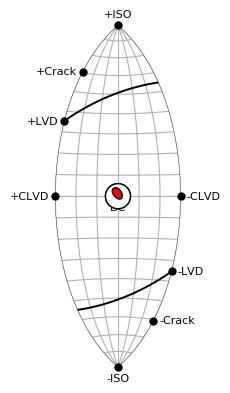

In [35]:
# Compute full moment tensor and plot the result on the lune.
config = mttime.Configure(path_to_file=evdir+"/mtinv.in", degree=6)
tdmt = mttime.Inversion(config=config)
tdmt.invert()
tdmt.plot(view="lune", show=True)

In [12]:
# Finally save the results to file.
# Default is to save all the results
tdmt.write()

# Setting option to 'preferred' will only save the best solution
tdmt.write(option="preferred")